# ¿Qué son los árboles de decisión?

En palabras sencillas, un árbol de decisión es una estructura que contiene nodos (cajas rectangulares) y aristas (flechas) y se construye a partir de un conjunto de datos (tabla de columnas que representan características/atributos y filas que corresponden a registros). Cada nodo se utiliza para tomar una decisión (conocido como nodo de decisión) o representa un resultado (conocido como nodo hoja).

In [1]:
import pandas as pd

In [25]:
covid=pd.read_csv('covid.csv')
covid = covid.drop(columns=['id']) 

In [26]:
covid.head()

,fever,cough,breathing_issues,infected
0,no,no,no,no
1,yes,yes,yes,yes
2,yes,yes,no,no
3,yes,no,yes,yes
4,yes,yes,yes,yes


## Métricas en ID3
Como vimos en la clase 2, el algoritmo ID3 selecciona la mejor característica en cada paso mientras construye un árbol de decisión.
Antes de que lo pregunte, la respuesta a la pregunta: "¿Cómo selecciona ID3 la mejor característica?" es que ID3 utiliza la ganancia de información o simplemente la ganancia para encontrar la mejor característica.

La ganancia de información calcula la reducción de la entropía y mide lo bien que una característica determinada separa o clasifica las clases objetivo. La característica con la mayor ganancia de información se selecciona como la mejor.


In [27]:
covid['fever'] = covid['fever'].map({'yes':1 ,'no':0})
covid['cough'] = covid['cough'].map({'yes':1 ,'no':0})
covid['breathing_issues'] = covid['breathing_issues'].map({'yes':1 ,'no':0})
covid['infected'] = covid['infected'].map({'yes':1 ,'no':0})

In [28]:
covid.head()

,fever,cough,breathing_issues,infected
0,0,0,0,0
1,1,1,1,1
2,1,1,0,0
3,1,0,1,1
4,1,1,1,1


In [37]:
from sklearn import tree

In [38]:
X = covid.drop('infected', axis=1).values
y = covid['infected'].values

model = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(167.4, 181.2, 'X[3] <= 0.5\nentropy = 0.985\nsamples = 14\nvalue = [8, 6]'),
 Text(83.7, 108.72, 'X[0] <= 12.5\nentropy = 0.544\nsamples = 8\nvalue = [7, 1]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]')]

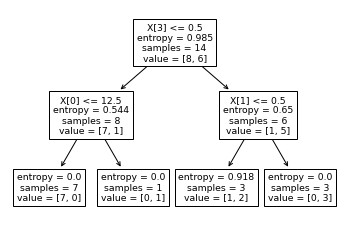

In [39]:
tree.plot_tree(model)

* Ejercicio realizar el cálculo de ganancia de información al igual que se hizo en la teoría.

Del total de 14 filas de nuestro conjunto de datos S, hay 8 filas con el valor objetivo SI y 6 filas con el valor objetivo NO. La entropía de S se calcula como:
$$
Entropy(S)=-(8/14)\log_{2}(8/14)-(6/14)\log_{2}(6/14)=0.99
$$

Ahora calculamos la ganancia de información de cada característica:

Cálculo de Ganancia de información para Fiebre:
En esta característica (Fiebre) hay 8 filas con valor SÍ y 6 filas con valor NO.
Como se muestra a continuación, en las 8 filas con SÍ para Fiebre, hay 6 filas con valor objetivo SÍ y 2 filas con valor objetivo NO.

In [30]:
covid['fever'].value_counts()

1    8
0    6
Name: fever, dtype: int64

In [31]:
covid

,fever,cough,breathing_issues,infected
0,0,0,0,0
1,1,1,1,1
2,1,1,0,0
3,1,0,1,1
4,1,1,1,1
5,0,1,0,0
6,1,0,1,1
7,1,0,1,1
8,0,1,1,1
9,1,1,0,1


Total de filas

|S| = 14

For v = YES, |Sᵥ| = 8

Entropy(Sᵥ) = - (6/8) * log₂(6/8) - (2/8) * log₂(2/8) = 0.81

For v = NO, |Sᵥ| = 6

Entropy(Sᵥ) = - (2/6) * log₂(2/6) - (4/6) * log₂(4/6) = 0.91

Ampliando la suma en la fórmula de ganancia:

IG(S, Fever) = Entropy(S) - (|Sʏᴇꜱ| / |S|) * Entropy(Sʏᴇꜱ) - 
(|Sɴᴏ| / |S|) * Entropy(Sɴᴏ)∴ IG(S, Fever) = 0.99 - (8/14) * 0.81 - (6/14) * 0.91 = 0.13

A continuación, calculamos el ganancia para las características "cough" y "breathing_issues".

IG(S, Cough) = 0.04

IG(S, BreathingIssues) = 0.40

Dado que la característica breathing_issues tiene la mayor ganancia de información, se utiliza para crear el nodo raíz.